In [1]:
%load_ext autoreload

In [4]:
%autoreload 

import os
import sys
sys.path.append('../../..')
import pickle

import numpy as np
from tqdm import tqdm_notebook as tqdm

import matplotlib
matplotlib.rc_file('../../matplotlibrc')
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
import matplotlib.colors as colors
%matplotlib inline

import darkhistory.physics as phys

In [21]:
data_list = []

#dir_str = '/scratch/gpfs/hongwanl/DarkHistory/full_distortion/max_CMB_nmax_200_Puchwein/'
dir_str = '/Users/viviesque/Dropbox (MIT)/DarkHistory_V2/data/HL_nmax_200_runs/'

directory = os.fsencode(dir_str)
skip = 4

for file in tqdm(sorted(os.listdir(directory))[::skip]): 

    filename = os.fsdecode(file)

    data_list.append(pickle.load(open(dir_str+filename, 'rb')))

/Users/viviesque/opt/anaconda3/envs/DarkHistoryEnvironment/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


NameError: name 'fig_dir' is not defined

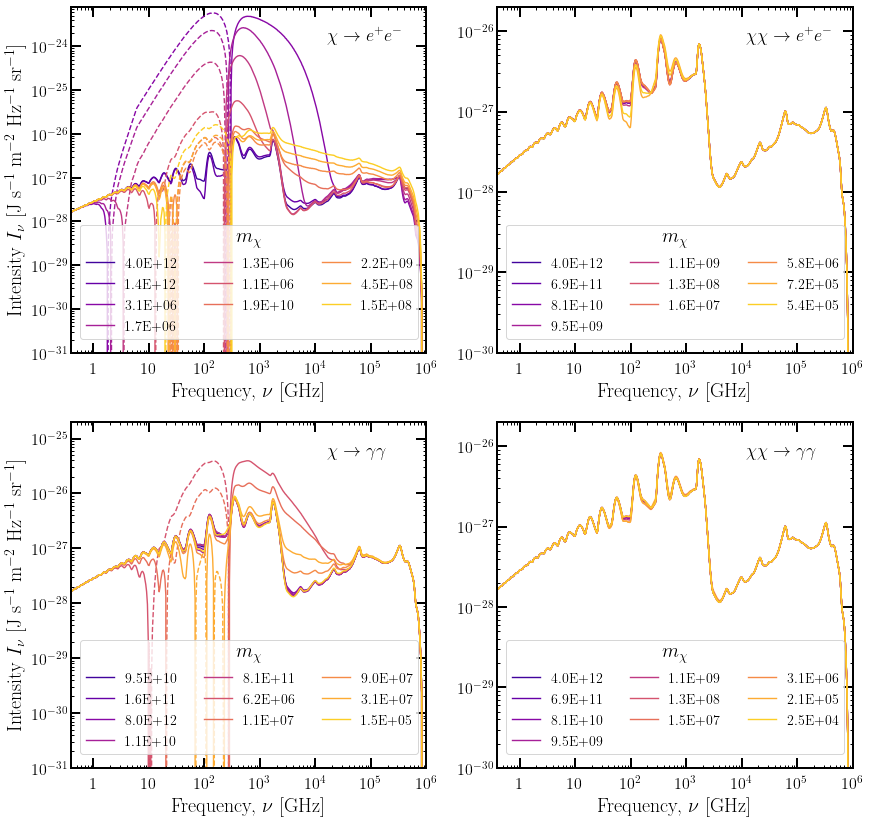

In [43]:
eng = data_list[0]['data'][-1]['distortion'].eng
hplanck = phys.hbar * 2 * np.pi
convert = phys.nB * eng * hplanck * phys.c /(4*np.pi) * phys.ele * 1e4
nu = eng/hplanck

figs, axs = plt.subplots(2, 2, figsize=(14, 14))
cmap = cm.plasma(np.linspace(0.1, 0.9, 40/skip))

for i, pri in enumerate(['elec', 'phot']):
    axs[i][0].set_ylabel(
        r'Intensity $I_{\nu}$ '
        +'[J s$^{-1}$ m$^{-2}$ Hz$^{-1}$ sr$^{-1}$]', 
        fontsize=20
    )
    for j, DM_process in enumerate(['decay', 'swave']):
        axs[i][j].loglog()
        axs[i][j].set_xlim([4e-1, 1e6])
        axs[i][j].set_xlabel(r'Frequency, $\nu$ [GHz]', fontsize=20)

        if DM_process == 'swave':
            if pri == 'elec':
                axs[i][j].set_ylim([1e-30, 2e-26])
                axs[i][j].text(0.7, 0.9, r'$\chi\chi \rightarrow e^+ e^-$', 
                                 fontsize = 18, transform = axs[i][j].transAxes)
            else:
                axs[i][j].set_ylim([1e-30, 2e-26])
                axs[i][j].text(0.7, 0.9, r'$\chi\chi \rightarrow \gamma\gamma$', 
                                 fontsize = 18, transform = axs[i][j].transAxes)
        else:
            if pri == 'elec':
                axs[i][j].set_ylim([1e-31, 8e-24])
                axs[i][j].text(0.72, 0.9, r'$\chi \rightarrow e^+ e^-$', 
                                 fontsize = 18, transform = axs[i][j].transAxes)
            else:
                axs[i][j].set_ylim([1e-31, 2e-25])
                axs[i][j].text(0.72, 0.9, r'$\chi \rightarrow \gamma\gamma$', 
                                 fontsize = 18, transform = axs[i][j].transAxes)
        k = 0 

        for data in data_list:
            if data['DM_params']['pri'] == pri and data['DM_params']['DM_process'] == DM_process: 

                axs[i][j].plot(
                    nu/1e9, convert * data['data'][-1]['distortion'].dNdE,
                    color=cmap[k], linestyle='solid', linewidth=1.4, label=f"{data['DM_params']['mDM']:.1E}"
                )
                axs[i][j].plot(
                    nu/1e9, -convert * data['data'][-1]['distortion'].dNdE,
                    color=cmap[k], linestyle='--', linewidth=1.4,
                )

                k += 1

        axs[i][j].legend(title=r'$m_\chi$', loc='lower center', fontsize=14, ncol=3)
plt.savefig(fig_dir+'distortion_grid.pdf')